In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def draw(x1,x2):
    ln = plt.plot(x1, x2)

def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T*y+np.log(1-p).T*(1-y))
    return cross_entropy

In [16]:
n_pts = 3
np.random.seed(0)
bias = np.ones(n_pts)
random_x1_values = np.random.normal(10, 4, n_pts)
random_x2_values = np.random.normal(12, 4, n_pts)
random_x3_values = np.random.normal(5, 4, n_pts)
random_x4_values = np.random.normal(7, 4, n_pts)
top_region = np.array([random_x1_values, random_x2_values, bias]).T
bottom_region = np.array([random_x3_values, random_x4_values, bias]).T
w1 = -0.2
w2 = -0.35
b = 5
line_parameters = np.matrix ([w1, w2, b]).T
x1 =np.array([bottom_region[:,0].min(),top_region[:,0].max()])
#x2 =np.array([bottom_region[:,1].max(),top_region[:,1].min()])

x2 = -b/w2 +x1 * (-w1 / w2)
#w1x1+w2x2+b


top_region

array([[17.05620938, 20.9635728 ,  1.        ],
       [11.60062883, 19.47023196,  1.        ],
       [13.91495194,  8.09088848,  1.        ]])

In [17]:
bottom_region

array([[ 8.80035367,  8.64239401,  1.        ],
       [ 4.39457117,  7.57617428,  1.        ],
       [ 4.58712459, 12.81709403,  1.        ]])

In [18]:
print(x1,x2)

[ 4.39457117 17.05620938] [11.77453076  4.53930892]


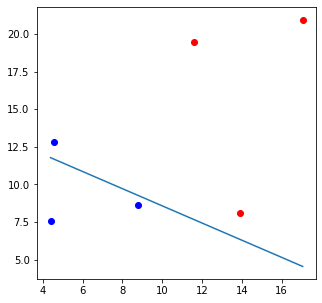

In [19]:
top_region = np.array([ top_region[:,0],  top_region[:,1], bias]).T
bottom_region = np.array([bottom_region[:,0],  bottom_region[:,1], bias]).T
all_points = np.vstack((top_region,bottom_region ))
_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(top_region[:,0], top_region [:,1], color = 'r')
ax.scatter(bottom_region[:,0], bottom_region [:,1], color = 'b')

draw(x1, x2)
plt.show()

In [20]:
print(all_points)
print(all_points.shape)
print(line_parameters.shape)

[[17.05620938 20.9635728   1.        ]
 [11.60062883 19.47023196  1.        ]
 [13.91495194  8.09088848  1.        ]
 [ 8.80035367  8.64239401  1.        ]
 [ 4.39457117  7.57617428  1.        ]
 [ 4.58712459 12.81709403  1.        ]]
(6, 3)
(3, 1)


In [21]:
linear_combination = all_points * line_parameters
linear_combination

matrix([[-5.74849236],
        [-4.13470695],
        [-0.61480136],
        [ 0.21509136],
        [ 1.46942477],
        [-0.40340783]])

In [22]:
probabilities = sigmoid(linear_combination)
probabilities

matrix([[0.00317745],
        [0.01575516],
        [0.35096472],
        [0.55356648],
        [0.81296994],
        [0.40049385]])

In [23]:
y= np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1) # used for entropy calculation
y

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [24]:
print(calculate_error(line_parameters, all_points, y))

[[0.36080379]]
